## Course Project

#### Introduction
In the course project, I analyze a real-world dataset on credit card fraud detection. This project involve 5 parts: Data exploration, data visualization, dimension reduction, classification, and the data analysis result. 

### Credit Card Fraud Detection


#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration
Load `creditcard_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('creditcard_train.csv')

#### 1. Explore the dataset

In [2]:
#Shape of the dataset
df.shape
print("The dataset contain {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset contain 284657 rows and 31 columns


In [3]:
#Explore the data
#overview of each column in the dataset. 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,...,284657.000000,284379.000000,284137.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000
mean,94820.043168,0.000942,-0.000761,0.001280,-0.000844,0.000591,0.000233,0.000956,-0.000145,0.000553,...,-0.000075,-0.000035,0.000011,0.000045,-0.000016,0.000008,-0.000056,-0.000008,88.340966,0.001553
std,47486.331846,1.955946,1.649907,1.510265,1.413999,1.378060,1.332089,1.230796,1.192554,1.097575,...,0.733731,0.725929,0.625052,0.605657,0.521244,0.482238,0.403245,0.330077,250.129519,0.039374
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-43.557240,-73.216718,-13.434070,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000,0.000000
25%,54208.000000,-0.920083,-0.598696,-0.889759,-0.848833,-0.691445,-0.768153,-0.553921,-0.208633,-0.642783,...,-0.228421,-0.542878,-0.162192,-0.354543,-0.317147,-0.326978,-0.070844,-0.052954,5.600000,0.000000
50%,84704.000000,0.018393,0.065213,0.179930,-0.020146,-0.054336,-0.274058,0.040115,0.022323,-0.051198,...,-0.029518,0.007694,-0.011614,0.041012,0.016532,-0.052152,0.001326,0.011233,22.000000,0.000000
75%,139324.000000,1.315753,0.803360,1.027294,0.742826,0.611926,0.398611,0.570420,0.327241,0.597343,...,0.186287,0.529204,0.148051,0.439603,0.350702,0.240932,0.091001,0.078243,77.150000,0.000000
max,172792.000000,2.454930,22.057730,9.382558,16.875340,34.801666,73.301630,120.589500,20.007208,15.594990,...,27.202839,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000,1.000000


In [4]:
#Check the data type of each column
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

#### 2. Handle with missing value

In [5]:
#Checking missing value
df.isnull().sum()

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In [6]:
#Check the percentage of missing value in V22 and V23 columns
print('Percentage of missing value in {} and {} is {}% and {}% repectively'.format('V22','V23',(df.isnull().sum()['V22']*100/len(df.V22)),(df.isnull().sum()['V23']*100/len(df.V23))))

Percentage of missing value in V22 and V23 is 0.09766139599588276% and 0.1826759925102843% repectively


In [7]:
#As the proportion of missing value among V22 and V23 are small, so I would drop the missing value
df=df.dropna()
print("{} transactions are removed due to missingness".format(284657-df.shape[0]))

#Check whether all missing value is dropped
print("Any missing value:",df.isnull().values.any())

798 transactions are removed due to missingness
Any missing value: False


In [8]:
#Shape of df after drop na
df.shape

(283859, 31)

Normal:  283417 
Frauds:  442
There are 442 frauds out of 283859 transaction, 
0.156% of the total transactions in the train dataset


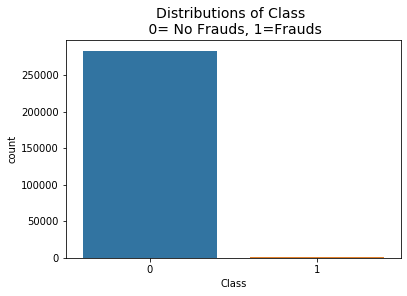

In [9]:
#Show the proportion of frauds and non-frauds transaction in the dataset 

count=df.Class.value_counts()
print("Normal: ",count[0], "\nFrauds: ",count[1])
print('There are {} frauds out of {} transaction, \n{}% of the total transactions in the train dataset'.format(count[1],df.shape[0],round((count[1]*(100)/df.shape[0]),3)))
sns.countplot('Class', data=df);
plt.title('Distributions of Class \n 0= No Frauds, 1=Frauds', fontsize=14);


This show that the dataset is unbalance that only contain low portion of the frauds transaction in the train data. The model may not accurate if the training set only consist less portion of frauds transaction. This mean, we have to undersampling before perform the model. 

In [10]:
#Correlation between the feature and the Class target
df.corr().Class

Time     -0.010788
V1       -0.095634
V2        0.086109
V3       -0.182182
V4        0.125610
V5       -0.088806
V6       -0.041450
V7       -0.177211
V8        0.018591
V9       -0.091813
V10      -0.202972
V11       0.144667
V12      -0.243611
V13      -0.004418
V14      -0.284468
V15      -0.002714
V16      -0.184124
V17      -0.308405
V18      -0.103769
V19       0.033930
V20       0.018640
V21       0.040522
V22      -0.000616
V23      -0.002691
V24      -0.006827
V25       0.002649
V26       0.004059
V27       0.015194
V28       0.009835
Amount    0.004948
Class     1.000000
Name: Class, dtype: float64

#### 3. Handling with Outlier 

In [11]:
#Detect outliers
#Caclulate the lower limit and upper limit

Q1= df.quantile(0.25)
Q3=df.quantile(0.75)
IQR= Q3-Q1

lower_limit=Q1 - 1.5 * IQR
upper_limit=Q3 + 1.5 * IQR

In [12]:
#Remove outlier
#Only consider Amount, as V1-V28 is unknown variables, the effect of remove outlier in V1-V28 are uncertain on the performance of the model is uncertain.


df_withoutoutliers=df[~((df.Amount < lower_limit.Amount) | (df.Amount > upper_limit.Amount))]
outliers=df[((df.Amount < lower_limit.Amount) | (df.Amount > upper_limit.Amount))]

df_withoutoutliers


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284651,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284652,172786.0,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284653,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284654,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [13]:
print("Number of Outlier:",((df.Amount < lower_limit.Amount) | (df.Amount > upper_limit.Amount)).sum())
print("There is {} transactions are removed".format(outliers.shape[0]))
print("There is {} transaction reminded for training the model".format(df_withoutoutliers.shape[0]))

Number of Outlier: 31812
There is 31812 transactions are removed
There is 252047 transaction reminded for training the model


In [14]:
count=df_withoutoutliers.Class.value_counts()
newdf=df_withoutoutliers
print("Normal: ",count[0], "\nFrauds: ",count[1])
print('There are {} frauds out of {} transaction, \n{}% of the total transactions in the train dataset'.format(count[1],newdf.shape[0],round((count[1]*(100)/newdf.shape[0]),3)))

Normal:  251685 
Frauds:  362
There are 362 frauds out of 252047 transaction, 
0.144% of the total transactions in the train dataset


### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

#### 1. Distribution of all variables 

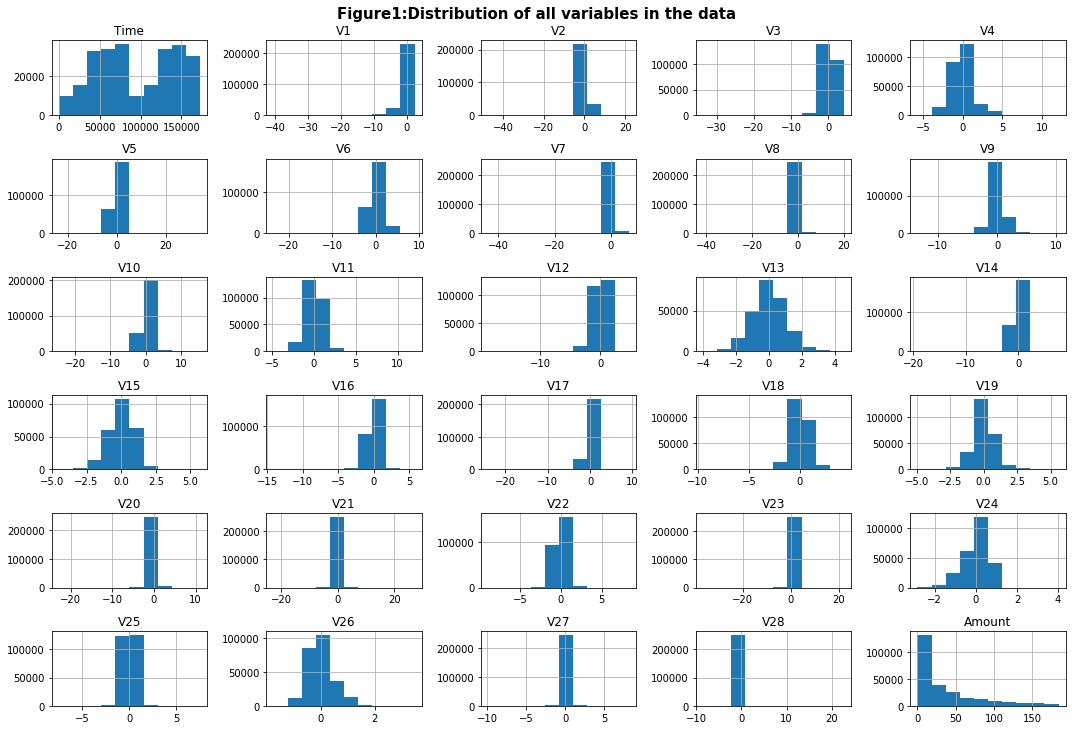

In [15]:
fig, axs = plt.subplots(6, 5, squeeze=True,figsize=(15,10))

for i, ax in enumerate(axs.flatten()):
    ax.set_title(newdf.columns[i])
    newdf.iloc[:, i].hist(ax=ax)
    ax.set_xlabel('')
plt.tight_layout()
plt.suptitle("Figure1:Distribution of all variables in the data",fontweight="bold",fontsize=15,y=1.01);
    

##### From figure 1, it is found that only Time features has two peak, while other variales are in simialr distribution type with mean of 0. Besides, the Amount feature is right skewed. This indicates that the variances in Time and Amount variables are large.

#### 2. Distribution of Variables in the Frauds Group and Normal Group (Blue: Frauds, Red: Normal)

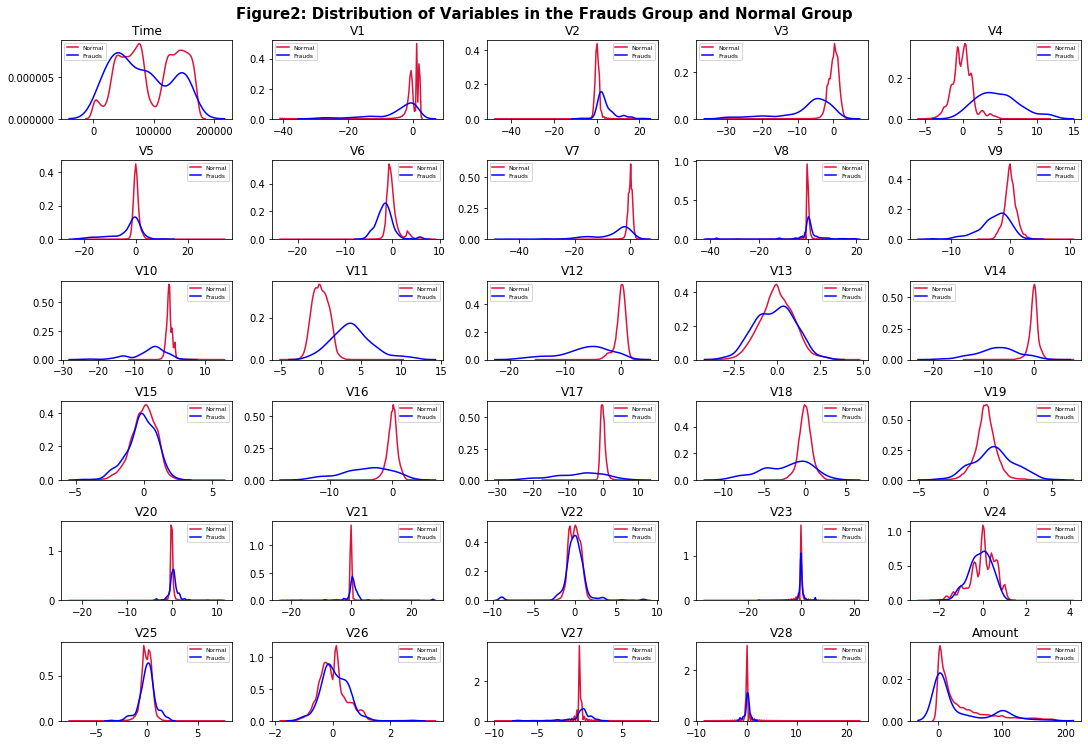

In [16]:
newdf0=newdf[newdf.Class==0]
newdf1=newdf[newdf.Class==1]
fig, axs = plt.subplots(6, 5, squeeze=False,figsize=(15,10),constrained_layout=True)

for i, ax in enumerate(axs.flatten()):
    ax.set_title(newdf.columns[i])
    sns.distplot(newdf0.iloc[:, i], ax=ax,
                color="#DC143C",label="Normal",hist=False)
    sns.distplot(newdf1.iloc[:,i],ax=ax, color='blue',label="Frauds",hist=False)
    ax.set_xlabel('')
    ax.legend(loc="best",fontsize=5.8)
    
plt.suptitle("Figure2: Distribution of Variables in the Frauds Group and Normal Group", fontweight="bold",fontsize=15, y=1.02);

##### From figure 2, It is found that there are some outlers among majority of variables, and significant in the following features: V2,4,7,9-12,14,16-18, Amount, and Time, while the outliers might be helpful to classify normal class and frauds class. Moreover, the distribution of the V1-V28 are similar,they have mean of 0 in both classes, except V3,4,11,12,14,16,17. Those variables with different distribution would helpful to classify the normal and the frauds class. Moreover, V13,15,22,25 have similar patten among normal and frauds class.

#### 3. Boxplot Distribution of Variables in Frauds Group and Normal Group

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:221: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9, wspace=0.2)


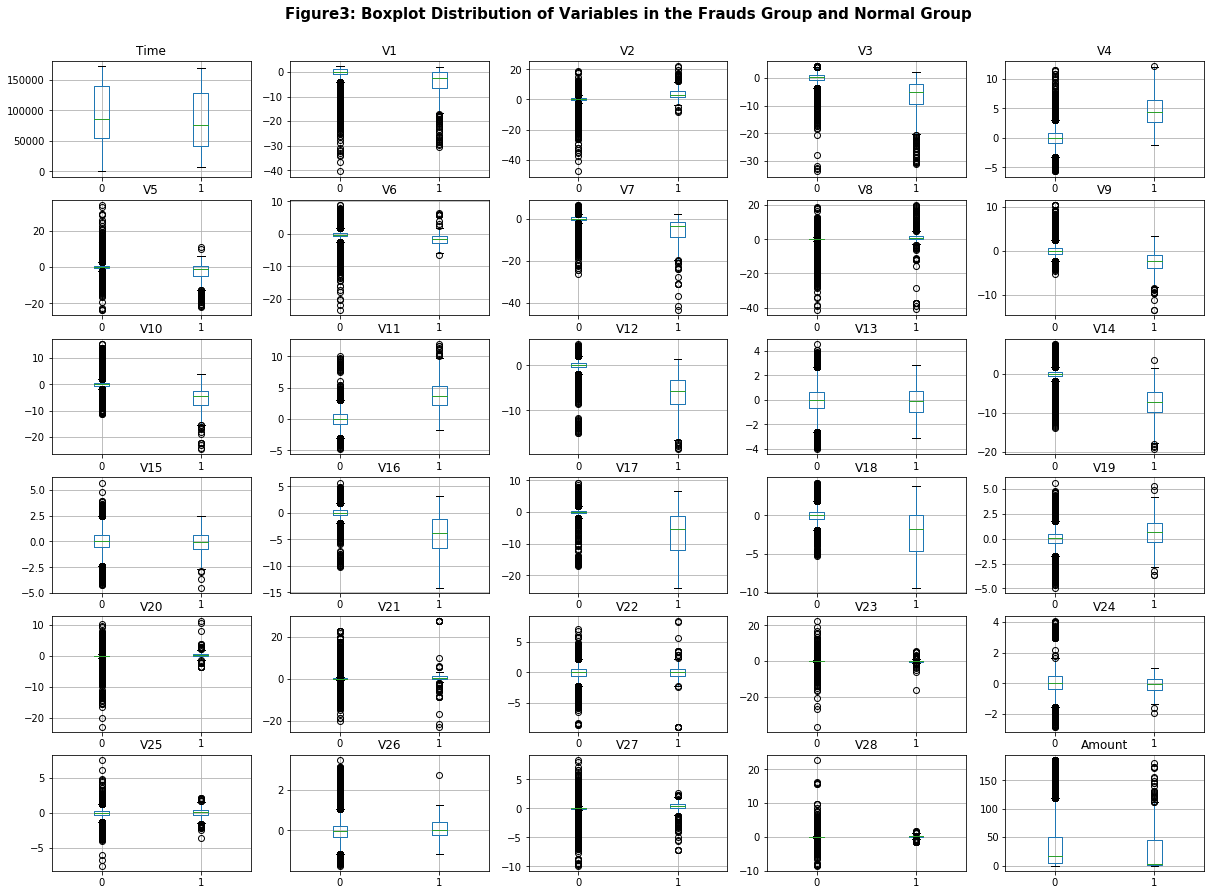

In [17]:
fig, axs = plt.subplots(6, 5, squeeze=False,figsize=(20,15),constrained_layout=True)

for i, ax in enumerate(axs.flatten()):
    ax.set_title(newdf.columns[i])
    newdf.boxplot(column=newdf.columns[i],by="Class",ax=ax)
    ax.set_xlabel('')
    #ax.legend(loc="best",fontsize=5.8)
    

plt.suptitle("Figure3: Boxplot Distribution of Variables in the Frauds Group and Normal Group", fontweight="bold",fontsize=15, y=0.95);

##### Figure 3, it is found that there are outliers among the variables which may helpful in identify normal and frauds class.

#### 4. Some Boxplot Distribution of variables with extreme outlier

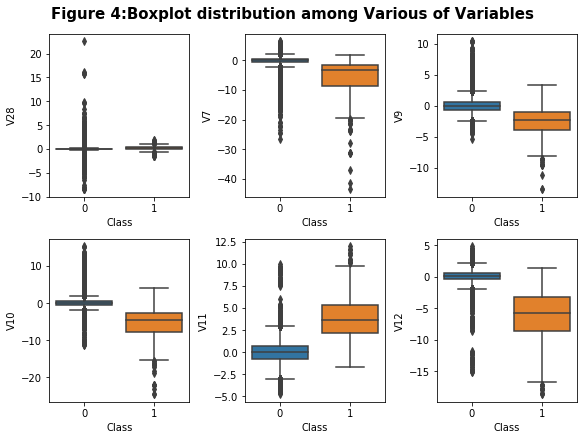

In [18]:

fig,axes=plt.subplots(2,3,figsize=(8,6),constrained_layout=True)

ax1=sns.boxplot(ax=axes[0,0],data=newdf, x='Class',y='V28');
ax2=sns.boxplot(ax=axes[0,1],data=newdf, x='Class',y='V7');
ax3=sns.boxplot(ax=axes[0,2],data=newdf, x='Class',y='V9');
ax4=sns.boxplot(ax=axes[1,0],data=newdf, x='Class',y='V10');
ax5=sns.boxplot(ax=axes[1,1],data=newdf, x='Class',y='V11');
ax6=sns.boxplot(ax=axes[1,2],data=newdf, x='Class',y='V12');

plt.suptitle("Figure 4:Boxplot distribution among Various of Variables", fontsize=15,fontweight='bold')
plt.show()

##### Figure 4 shows the boxplot of some variables, it is found that there are some exteme high or low outlier in frauds class compare to the normal class, while those outlier would helpful to identify the transaction class. While the for the Q3 of class 1 are lower than the Q1 of Class 0 in V7,V9,V10,12, and Q1 of class 1 is higher than Q3 of class 0 in V11.This means that those variables may helpful to identify normal and frauds transaction. #####

#### 5. Correlation matrix among the variables

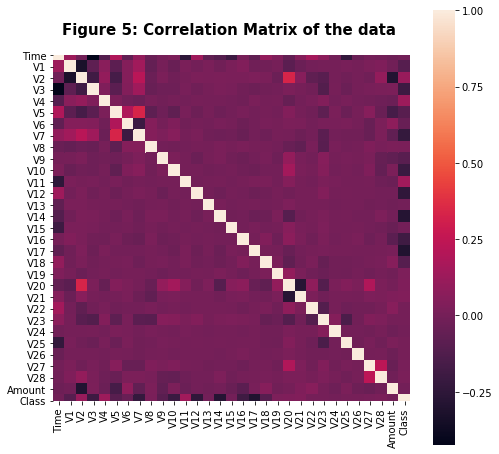

In [19]:
# Correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(newdf.corr(),square=True)
plt.suptitle("Figure 5: Correlation Matrix of the data", fontweight="bold", fontsize=15, x=0.43, y=0.86);

#fig, axs= plt.subplots(2,1,figsize=(15,15))

#axs[0].set_title("i. Correlation Matrix of Data without Outlier Removal",fontweight="bold",fontsize=13)
#sns.heatmap(df.corr(),square=True,ax=axs[0])

#axs[1].set_title("ii. Correlation Matrix of Data with Outlier Removal in Amount Feature", fontweight="bold",fontsize=13)

##### Figure 5 indicates that the Class target may have negative correlation with V3,V7,V10,V14,V17. And have nnegative correlation between V1 and V2, between V6,V7, between V20 and V21. And some correlation between variables. However, the overall correlation between variables are weak.

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

In [20]:
#Standardize data
from sklearn.preprocessing import StandardScaler
x = newdf.iloc[:,:-1].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape

(252047, 30)

In [21]:
standardized_x=pd.DataFrame(x)
standardized_x['Class']=newdf['Class']

In [22]:
from sklearn.decomposition import PCA
pca_x=PCA(n_components=2)
x2=standardized_x.iloc[:,:-1]
x_2D=pca_x.fit_transform(x2)

Explained variation per principal component: [0.05904469 0.05673386]


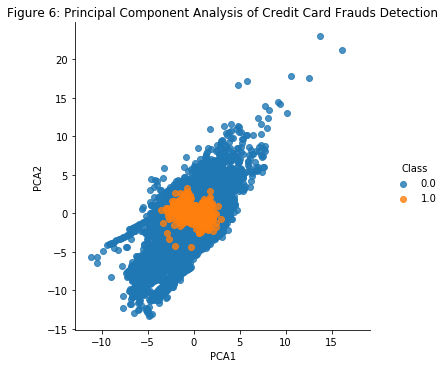

In [23]:
standardized_x["PCA1"]=x_2D[:,0]
standardized_x["PCA2"]=x_2D[:,1]

sns.lmplot("PCA1","PCA2", hue='Class',data=standardized_x, fit_reg=False);
plt.title("Figure 6: Principal Component Analysis of Credit Card Frauds Detection");
print('Explained variation per principal component: {}'.format(pca_x.explained_variance_ratio_))

##### From figure 6, we can see that the variance in PCA1 and PCA2 are similar, so those components are useful to train a classifier. This indicates that maybe more than 2 variables are needed to train a classifier. Moreover, the explained variance is around 10%, which is significant low, many information would loss if only use 2 pca variables to train a classifier.

##### Also, from the figure 6, it is found that that two classes are overlapped, it indicates that the two classes couldn't be identified correctly by only using two components. This also indicate that two principal components are insufficient for us to train a good model for credit card frauds detection. 

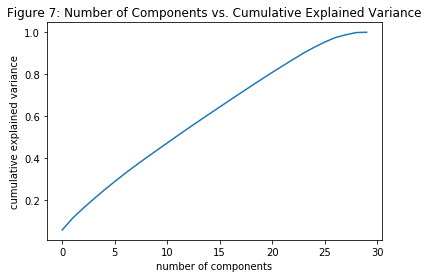

In [24]:
# Show the Number of Components vs. Cumulative Explained Variance")
from sklearn.decomposition import PCA
pca=PCA().fit(x2)
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlabel('number of components');
plt.ylabel('cumulative explained variance');
plt.title("Figure 7: Number of Components vs. Cumulative Explained Variance");

In [25]:
from sklearn.decomposition import PCA

pca= PCA(n_components=0.95)
pca_card=pca.fit_transform(x2)

pca_df=pd.DataFrame(data = pca_card,columns=['PCA'+str(i+1) for i in range(pca_card.shape[1])])

#Number of components in order to retain 95%  of variance                      
print("n_component needed to retain 95% variances:",pca.n_components_)

n_component needed to retain 95% variances: 26


##### From the above result, 26 components needed to retain 95% total explained variance, while in figure 7 shows that almost 30 components need to retain 99% explainedd variance. so I would not perform PCA dimension reduction before fit data into the model.**


### Module 4: Classification
Choose three classification methods and build classification models, using 5-fold cross-validation. <br>

Further, load `creditcard_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix. <br>

Hint: because the dataset is highly unbalanced, consider undersampling, i.e. randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples for model fitting and training. 

In [26]:
#Undersampling

normal_count,fraud_count=newdf.Class.value_counts()
df_normal=newdf[newdf.Class==0]
df_fraud=newdf[newdf.Class==1]

df_noraml_under=df_normal.sample(fraud_count,random_state=1)
sample=pd.concat([df_noraml_under,df_fraud],axis=0).reset_index(drop=True)

print('Random under-sampling:')
print(sample.Class.value_counts())
#sample.Class.value_counts().plot(kind='bar',title = 'count(Class)',color=['y','b'])

Random under-sampling:
1    362
0    362
Name: Class, dtype: int64


In [27]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [28]:
#Split the sample into x_train and y_train
X=sample.iloc[:,:-1]
y=sample.Class

In [29]:
df_test= pd.read_csv('creditcard_test.csv')

In [30]:
#Check missing value in the dataset
df_test.isnull().values.any()

False

In [31]:
#Check the column name of the test dataset 
df_test.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [32]:
#Sperate the test data into x_test and Y_test, then check the shape

X_test, Y_test= df_test.iloc[:,:-1], df_test.Class
X_test.shape, Y_test.shape

((150, 30), (150,))

### 1. Random Foreset Classifier###

In [33]:
# 5 fold Cross Validation without hyperparameter tunning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model=RandomForestClassifier(random_state=1)
cv_rfc=cross_val_score(model, X,y, cv=5,scoring='accuracy')
print(cv_rfc)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_rfc.mean(), cv_rfc.std()))

[0.95205479 0.92465753 0.90972222 0.93055556 0.94444444]
Accuracy: 0.93 (+/- 0.01)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

In [34]:
#Hyperparameter Tunning with 5 fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf2=RandomForestClassifier(random_state=1)
param_grid={'n_estimators':[50,100,150,200]}
cv2=GridSearchCV(clf2, param_grid=param_grid,cv=5)
cv2.fit(X,y)
print(cv2.best_estimator_)

#cv2.best_params_
print("Accuracy after tune: %0.2f" %(cv2.best_score_))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
Accuracy after tune: 0.95


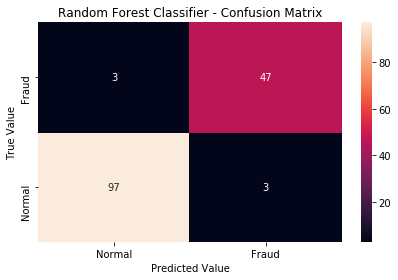

<Figure size 576x432 with 0 Axes>

In [35]:
#Confusion Matrix to show the result

from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred_rfc = cv2.predict(X_test)
C_rfc = confusion_matrix( Y_test,Y_pred_rfc)
labels= ['Normal', 'Fraud'] 
rfc_matrix=sns.heatmap(C_rfc, xticklabels= labels, yticklabels= labels,annot=True);
rfc_matrix
plt.title("Random Forest Classifier - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.ylim(0,2)
plt.tight_layout()
plt.figure(figsize=(8,6));

In [36]:
#Show the Classification Report of the model

from sklearn.metrics import classification_report
rfc=classification_report(Y_test, Y_pred_rfc, output_dict=True)
print(classification_report(Y_test, Y_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.96      0.96      0.96       150



In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_rfc)

0.955

In [38]:
from sklearn.metrics import auc, precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_rfc)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_rfc = auc(recall, precision)
auc_precision_recall_rfc

0.95

### 2.Decision Tree Classifier ###

In [39]:
# 5 fold Cross Validation without hyperparameter tunning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model=DecisionTreeClassifier(random_state=1)
cv_dtc=cross_val_score(model, X,y, cv=5,scoring='accuracy')
print(cv_dtc)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_dtc.mean(), cv_dtc.std()))

[0.89726027 0.92465753 0.92361111 0.94444444 0.90972222]
Accuracy: 0.92 (+/- 0.02)


In [40]:
#Hyperparameter Tunning with 5 fold cross validation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
clf3=DecisionTreeClassifier(random_state=1)
cv3=GridSearchCV(clf3,param_grid={'max_depth':[2,3,4,5]},cv=5)
cv3.fit(X,y)
print(cv3.best_estimator_)



print("Accuracy after tune: %0.2f" % (cv3.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')
Accuracy after tune: 0.93


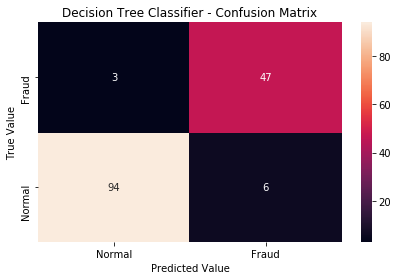

<Figure size 576x432 with 0 Axes>

In [41]:
#Confusion Matrix to show the result

from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred_dtc = cv3.predict(X_test)
C_dt = confusion_matrix(Y_test,Y_pred_dtc)
labels= ['Normal', 'Fraud'] 
dtc_matrix=sns.heatmap(C_dt,xticklabels= labels, yticklabels= labels, annot=True, fmt="d");
dtc_matrix
plt.title("Decision Tree Classifier - Confusion Matrix"); 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.ylim(0,2)
plt.tight_layout()
plt.figure(figsize=(8,6));

In [42]:
#Show the Classification Report of the model

dtc=classification_report(Y_test, Y_pred_dtc,output_dict=True)
print(classification_report(Y_test, Y_pred_dtc))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       100
           1       0.89      0.94      0.91        50

    accuracy                           0.94       150
   macro avg       0.93      0.94      0.93       150
weighted avg       0.94      0.94      0.94       150



In [43]:
from sklearn.metrics import auc, precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_dtc)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_dtc = auc(recall, precision)

### 3. Logistics Regression ###

In [44]:
# 5 fold cross validation without hyperparameter tunning

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model=LogisticRegression()
cv_lg=cross_val_score(model, X,y, cv=5,scoring='accuracy')
print(cv_lg)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_lg.mean(), cv_lg.std() *2))

[0.97260274 0.95890411 0.92361111 0.95833333 0.86111111]
Accuracy: 0.93 (+/- 0.08)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [45]:
#Tune the hyperparameter
from sklearn.model_selection import GridSearchCV
clf5=LogisticRegression(random_state=1)
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
cv5=GridSearchCV(clf5,param_grid=param_grid,cv=5)
cv5.fit(X,y)
cv5.best_estimator_

cv5.best_score_
#cv5.best_params_
print("Accuracy after tune: %0.2f" %( cv5.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Accuracy after tune: 0.94


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

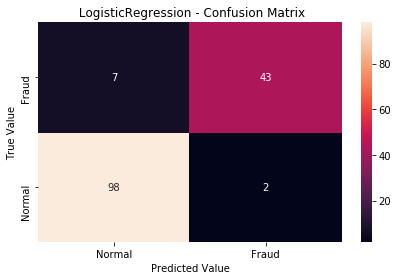

<Figure size 576x432 with 0 Axes>

In [46]:
# Show result with confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred_ls = cv5.predict(X_test)
C_ls = confusion_matrix(Y_test,Y_pred_ls)
labels= ['Normal', 'Fraud'] 
ls_matrix=sns.heatmap(C_ls,xticklabels= labels, yticklabels= labels, annot=True);
ls_matrix
plt.title(" LogisticRegression - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.ylim(0,2)
plt.tight_layout()
plt.figure(figsize=(8,6));

In [47]:
# Show the classification result of the model
ls=classification_report(Y_test, Y_pred_ls,output_dict=True)
print(classification_report(Y_test, Y_pred_ls))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       100
           1       0.96      0.86      0.91        50

    accuracy                           0.94       150
   macro avg       0.94      0.92      0.93       150
weighted avg       0.94      0.94      0.94       150



In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
from sklearn.metrics import auc, precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_ls)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_ls = auc(recall, precision)

In [50]:
result=pd.DataFrame({"Classification Method":['Random Forest Classifier','Decision Tree Classifier','Logistic Regression'],
                     "Accuarcy":[rfc.get('accuracy'),dtc.get('accuracy'),ls.get('accuracy')],
                     "Recall of Frauds Class":[rfc.get('1').get('recall'),dtc.get('1').get("recall"),ls.get('1').get("recall")],
                     "Precision of frauds class":[rfc.get('1').get('precision'),dtc.get('1').get("precision"),ls.get('1').get("precision")]})

result.set_index('Classification Method')

,Accuarcy,Recall of Frauds Class,Precision of frauds class
Classification Method,,,
Random Forest Classifier,0.96,0.94,0.940000
Decision Tree Classifier,0.94,0.94,0.886792
Logistic Regression,0.94,0.86,0.955556


### Module 5: Summary
Summarize your findings and draw conclusions.

#### 1. Data Preparation ####

**Handling with Missing Value**\
798 transactions are removed due to missingness, because the proportion of missing value is less in the dataset, so i drop all the missing value.


**Handling with extreme outlier**\
V1-V28 are unknown variables, so I did not remove any outliers in those variables, because the meaning of the outlier is unknown. And the value in time variable have 2 peaks, so i didn't remove outlier from Time variable.

The following are the method tried on handling the outlier: 

i) Remove outlier in Amount feature in both normal and frauds class removed\
ii) Remove outlier in Amount in normal class only\
iii) Do not remove any outlier

As both of the three models have better performance with method one, so I used data with **outlier in Amount variable of both normal and frauds class reomved**. Then, 31812 transactions are removed because of outliers, and a total **252047** transaction reminded for training the model after data cleaning. 362 fraud (0.144%)transaction remained in the train dataset.

#### 2. Findings from data visualization session and dimension reduction ####

First, from figure 1, it is found that only Time features has two peak, while other variales are in simialr distribution type with mean of 0. Besides, the Amount feature is right skewed. This indicates that the variances in Time and Amount variables are large.

Second, from figure 2, It is found that there are some outlers among majority of variables, and significant in the following features: V2,4,7,9-12,14,16-18, Amount, and Time, while the outliers might be helpful to classify normal class and frauds class. Moreover, the distribution of the V1-V28 are similar,they have mean of 0 in both classes, except V3,4,11,12,14,16,17. Those variables with different distribution would helpful to classify the normal and the frauds class. Moreover, V13,15,22,25 have similar patten among normal and frauds class.

Third, from figure 3 and 4, it is found that there are outliers among the variables which may helpful in identify normal and frauds class. While figure 4 shows boxplot of some variables, it is found that there are some exteme high or low outlier in frauds class compare to the normal class, while those outlier would helpful to identify the transaction class.

Forth, from figure 5, it is found that there is weak correlation between the feartures in frauds class.

From the above findings, there are variances between the feature. In order to capture all the iinformation, I decide not to remove any features in the training dataset. 

Moreover, from the figure 6 (dimension reduction session), it is found that two classes are overlapped, it indicates that two principal components are insufficient to build a good model, because two classes couldn't be identify by only using those two components. Moreover, the PCA dimension reduction show that 26 variables are nedded to retain 95% variance. While from figure 7, it is found that almost 30 variables are nedded to retain 99% variances. Thus, in order to not loss much infomation, I did not do any dimension reduction before fit the train data into the model. 



#### 3. Classification Method  ####

**Random Forest Classifier, Decision Tree,** and **Logistics Regression classification** methods are selected to build the classification model. And the best model would be selected by considering the **accuracy, precision and the recall rate**.

As the model preformance with standardized data is worse than that of without standardization, so I built the models without standardized the data. 

#### 4. Result ####

In [51]:
result=pd.DataFrame({"Classification Method":['Random Forest Classifier','Decision Tree Classifier','Logistic Regression'],
                     "Accuarcy":[rfc.get('accuracy'),dtc.get('accuracy'),ls.get('accuracy')],
                     "Precision of Noraml Class":[rfc.get('0').get('precision'),dtc.get('0').get("precision"),ls.get('0').get("precision")],
                     "Precision of Frauds Class":[rfc.get('1').get('precision'),dtc.get('1').get("precision"),ls.get('1').get("precision")],
                     "Recall of Normal Class":[rfc.get('0').get('recall'),dtc.get('0').get("recall"),ls.get('0').get("recall")],
                     "Recall of Frauds Class":[rfc.get('1').get('recall'),dtc.get('1').get("recall"),ls.get('1').get("recall")], 
                     "ROC_AUC": [roc_auc_score(Y_test, Y_pred_rfc),roc_auc_score(Y_test, Y_pred_dtc),roc_auc_score(Y_test, Y_pred_ls)],
                     "AUC_Precision_Recall":[auc_precision_recall_rfc,auc_precision_recall_dtc,auc_precision_recall_ls],
                       })
result.set_index('Classification Method')
result=result.style.set_caption("Table 1: Comparison of model performance among different classification method")
result=result.hide_index()
result

Classification Method,Accuarcy,Precision of Noraml Class,Precision of Frauds Class,Recall of Normal Class,Recall of Frauds Class,ROC_AUC,AUC_Precision_Recall
Random Forest Classifier,0.96,0.97,0.94,0.97,0.94,0.955,0.95
Decision Tree Classifier,0.94,0.969072,0.886792,0.94,0.94,0.94,0.923396
Logistic Regression,0.94,0.933333,0.955556,0.98,0.86,0.92,0.931111


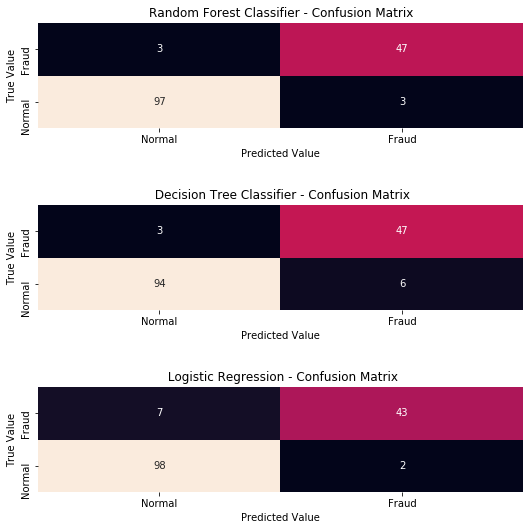

<Figure size 576x432 with 0 Axes>

In [52]:
fig, axs=plt.subplots(3,1, figsize=(8,8))

ax2=sns.heatmap(C_dt,xticklabels= labels, yticklabels= labels, annot=True,cbar=False,ax=axs[1]);
ax2.set_title(" Decision Tree Classifier - Confusion Matrix") 
ax2.set_ylabel('True Value') 
ax2.set_xlabel('Predicted Value') 
ax2.set_ylim(0,2)

plt.figure(figsize=(8,6));

ax1=sns.heatmap(C_rfc,xticklabels= labels, yticklabels= labels, annot=True,cbar=False,ax=axs[0]) ;
ax1.set_title("Random Forest Classifier - Confusion Matrix") 
ax1.set_ylabel('True Value') 
ax1.set_xlabel('Predicted Value') 
ax1.set_ylim(0,2)

ax3=sns.heatmap(C_ls,xticklabels= labels, yticklabels= labels, annot=True,cbar=False ,ax=axs[2]);
ax3.set_title(" Logistic Regression - Confusion Matrix") 
ax3.set_ylabel('True Value') 
ax3.set_xlabel('Predicted Value') 
ax3.set_ylim(0,2)

fig.tight_layout(pad=3.0)
plt.tight_layout()


\
**Table 1** shows the performance score of the three models.\
The model perfomance would be evaluated by **precision, accuarcy, recall rate**. While the other scores are just for references.

First, among the accuracy rate, **Random Forest Classifier** has the **highest mean accuarcy**, **96%** which mean this model can predict both normal and frauds group correctly with 96% accuracy. While other models, decision tree classifier and logistics regression have 94% accuarcy, which lower than that of random forset classifier. However, accuracy rate is insufficent to evaluate a model, since the dataset is imbalance, there is only small proportion of frauds class, so precision and recall rate in frauds class would be considered as well.

Second, among the precision rate, **Logistics Regression** have the **highest precision rate**, **95.5%** in frauds class, which indicates that the proportion of frauds class that was actually correct in the logistic regression model is the highest. While random forest classifier have 94% precision rate, and that of decision tree classifier is the lowest.

However, among the recall rate, **Random Forest Classifier** has the **highest recall rate in frauds class**. Recall rate in this example means that the percentaage of actual frauds transaction that was correctly classified. This indicates that probability of the customser being charged on unpurchased item is the loswest among the models. Among the three model, Random Forest Classifier and Decision Tree Classifier have 3 False Frauds, while logistics regression has 7 False Frauds. Therefore, considering all the criteria, model with random forest classifier would be the best model for credit card frauds transaction.

In conclusion, when comparing the model performance using accuracy, precision and recall rate, model with **Random Forset Classifier** would perform the best in credit card fraud detection. 


